<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

In [ ]:
# titanic.info()
# titanic.describe()
# titanic.shape
# titanic.dtypes

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [4]:
# Check for missing values
missing_values = titanic.isnull()
print(missing_values)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [5]:
any_missing = titanic.isnull().any()
print(any_missing)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [6]:
# Total number of missing values in the DataFrame
total_missing = titanic.isnull().sum().sum()
print(total_missing)

866


In [7]:
# Count missing values in each column
missing_count = titanic.isnull().sum()

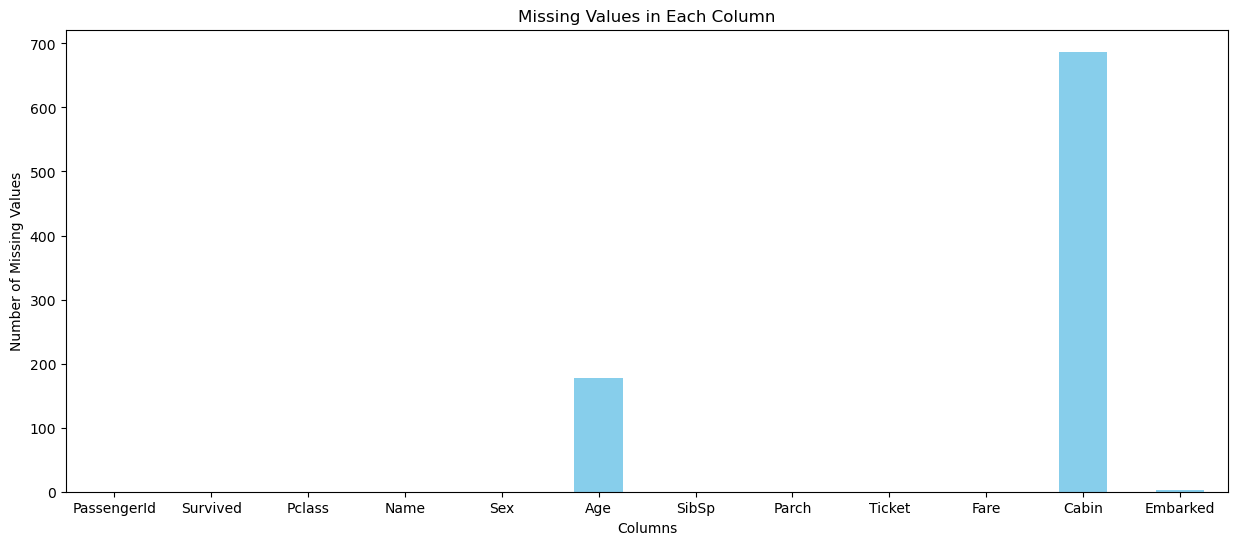

In [8]:
# Create a bar chart
plt.figure(figsize=(15, 6))
missing_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Assigning code shppets to variables
missing_values = titanic.isnull().sum().sort_values(ascending=False)
missing_values

# Why assign the output to a variable? Pros and cons
# Assigning to a variable makes more sense if you're going to use the output repeatedly
# Using descriptive and concise variable name choices
# Cons: More keystrokes, more time spent, etc. Now you've got many variables in your namespace.

# Avoid too many unneeded variables in your notebook. It's tough to track, and easier to lose track of.
# A Lab/project requirement is the ability of the IA (Torn) or the instructor to clone and run notebook
# without error.

# Output needs to be expressed in the notebook.

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [10]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# Count NaN values in each column
nan_count = titanic.isna().sum().sort_values(ascending=False)
nan_count

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
# Find the column with the most NaN values
most_nan_column = nan_count.idxmax()
most_nan_column

'Cabin'

In [13]:
# Print the NaN count in that column
nan_count_in_most_nan_column = nan_count[most_nan_column]
nan_count_in_most_nan_column

687

####  3. Delete all rows where `Embarked` is empty

In [14]:
# result_embarked = titanic.dropna(subset=['Embarked'], inplace=False) 
titanic = titanic.dropna(subset=['Embarked'])

In [16]:
titanic['Embarked'].isnull().sum()
titanic.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            712
SibSp          889
Parch          889
Ticket         889
Fare           889
Cabin          202
Embarked       889
dtype: int64

In [18]:
# Assuming df is your DataFrame
df = titanic[titanic['Embarked'].notna()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [17]:
titanic.fillna({'Cabin': r'¯\(ツ)/¯'}, inplace=True)

In [18]:
# Define the shrug emoticon
shrug = r'¯\_(ツ)_/¯'
shrug

'¯\\_(ツ)_/¯'

In [ ]:
# Create an empty list to represent the cabins
# cabins = []

# num_cabins = len(titanic['Cabin'])
# num_cabins

In [ ]:
# cabins = [shrug for _ in range(num_cabins)]

In [ ]:
#titanic['Cabin'].replace(to_replace=[np.nan, '', None], value="¯\\_(ツ)_/¯", inplace=True)
#titanic['Cabin'].count()

In [19]:
titanic['Cabin'].count()

891

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [20]:
titanic['FamilyCount'] = titanic['Parch'] + titanic['SibSp']

In [21]:
titanic[['Parch', 'SibSp', 'FamilyCount']]

,Parch,SibSp,FamilyCount
0,0,1,1
1,0,1,1
2,0,0,0
3,0,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,2,1,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [22]:
titanic['IsReverend'] = titanic['Name'].str.contains('Rev.').map(lambda x: int(x))

In [23]:
titanic['IsReverend'].value_counts()

IsReverend
0    885
1      6
Name: count, dtype: int64

In [24]:
titanic[titanic['IsReverend']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1


#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [19]:
titanic_df = pd.get_dummies(titanic, columns=['Embarked'])

In [20]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [21]:
titanic_dummies = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#titanic'['Title'] = [each.split(',')[1].split('.')[0].strip() for each in titanic['Name']]

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [30]:
# Intergers - boolean column
# 1 = Survived, 0 = Did not survive"
round(titanic['Survived'].mean()*100,2)

38.38

In [ ]:
#Calculate the overall average rate
#survival_rates = titanic['Survived']
#num_periods = len(survival_rates)
#total_survival = sum(survival_rates)
#average_rate = total_survival / num_periods

# Print the result
#print(f"Overall average survival rate: {average_rate:.2f}%")

#### 2. Which gender fared the worst? What was their survival rate?

In [31]:
titanic.groupby('Sex_male')[['Survived']].mean()

,Survived
Sex_male,
False,0.742038
True,0.188908


#### 3. What was the survival rate for each `Pclass`?

In [32]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [33]:
titanic.groupby('Pclass')[['Sex_male', 'Survived']].mean()
titanic.groupby(['Pclass','Sex_male'])[['Survived']].mean()
titanic.groupby(['Pclass','Sex_male'])[['Fare', 'Survived']].mean()

# Analysis:
# Overall survival rate: ~38%
# Survival broken out by Sex (women survived at much higher percentage than men)
# Survival broken out by Pclass and Sex (Women survived at a higher then men in each class
# - but first class survival % > 2nd class > 3rd class
#Women paid more for their ticket on average in each Pclass
# The gap in average fare 

Fare  Survived
Pclass Sex_male                      
1      False     106.125798  0.968085
       True       67.226127  0.368852
2      False      21.970121  0.921053
       True       19.741782  0.157407
3      False      16.118810  0.500000
       True       12.661633  0.135447

In [34]:
from itertools import groupby
df = titanic.groupby(titanic['Pclass'])
grouped_data = groupby(df, key=lambda x: x[0])
type(grouped_data)

for key, group in grouped_data:
    print(f"{key}: {[item for item in group]}")

1: [(1,      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                              McCarthy, Mr. Timothy J  54.0      0      0   
11                            Bonnell, Miss. Elizabeth  58.0      0      0   
23                        Sloper, Mr. William Thompson  28.0      0      0   
..                                                 ...   ...    ...

#### 4. Did any reverends survive? How many?`

In [35]:
titanic.groupby('IsReverend')[['Survived']].mean()

,Survived
IsReverend,
0,0.386441
1,0.000000


In [36]:
titanic[(titanic['IsReverend'] == 1) & (titanic['Sex_male'] == 1)][['Sex_male', 'Survived']]

,Sex_male,Survived
149,True,0
150,True,0
249,True,0
626,True,0
848,True,0
886,True,0


In [ ]:
# Name Reverend John Harper, Father Thomas Byles

In [37]:
result = titanic[titanic['Name'].str.contains('Rev.', case=False) & ~titanic['Name'].str.contains('Master.', case=True)]

num_records = len(result)
print(f"Number of records: {num_records}")

Number of records: 6


In [38]:
result

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1,False,True
150,151,0,2,"Bateman, Rev. Robert James",51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1,False,True
249,250,0,2,"Carter, Rev. Ernest Courtenay",54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1,False,True
626,627,0,2,"Kirkland, Rev. Charles Leonard",57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1,False,True
848,849,0,2,"Harper, Rev. John",28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1,False,True
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1,False,True


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [24]:
cabin_survival_rate = titanic[titanic['Cabin'] == r'¯\_(ツ)_/¯']['Survived'].mean()
print(f'Survival rate for cabins marked ¯\\_(ツ)_/¯: {cabin_survival_rate:.2%}')

Survival rate for cabins marked ¯\_(ツ)_/¯: nan%


#### 6. What is the survival rate for people whose `Age` is empty?

In [26]:
age_nan_survival_rate = titanic[titanic['Age'].isna()]['Survived'].mean()
age_nan_survival_rate

0.2937853107344633

In [27]:
round(titanic[titanic['Age'].isnull()]['Survived'].mean() * 100, 2)

29.38

####  7. What is the survival rate for each port of embarkation?

In [28]:
titanic[titanic['Age'] < 12].groupby('Embarked')[['Survived']].mean().mul(100)

,Survived
Embarked,
C,80.000000
Q,0.000000
S,57.407407


In [ ]:
#print(total_emb)
#print(empty_emb_count)
#print(populations)
#result3 = calculate_statistic_rate(total_Age, empty_age_count, populations)
#print(result3)

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [29]:
titanic[titanic['Age'] < 12].groupby('Pclass')[['Survived']].mean().mul(100).round(2)

,Survived
Pclass,
1,75.00
2,100.00
3,40.43


In [30]:
def count_under_than(numbers, threshold):
    return sum(1 for num in numbers if num < threshold)

In [49]:
numbers = titanic['Age']
count_under_than(numbers, 12)
#print(count_under_than(numbers, 12))

68

In [50]:
total_Pclass = int(len(titanic['Pclass']))
empty_Pclass_count = count_under_than(numbers, 12)
populations = int(len(titanic))

####  9. Did the captain of the ship survive? Is he on the list?

The captain of the Titanic was Edward John Smith. He was in command of the ship during its maiden voyage in April 1912.

In [31]:
titanic[titanic['Name'].str.contains('Capt.')][['Name', 'Survived']]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


In [32]:
result = titanic[titanic['Name'].str.contains('Capt.', case=True)]

In [53]:
result

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,S,2,0,False,True


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

On the Titanic, the most expensive first-class ticket was purchased by a man named **Thomas Andrews**, who was the ship's builder and managing director of Harland and Wolff. He had a ticket that cost **£31**, which is roughly equivalent to about **£3,000 to £4,000** in today's money, depending on the source of conversion.

However, when considering all passengers, the highest fare paid for a ticket on the Titanic is often attributed to **Molly Brown**, a prominent socialite known as the "Unsinkable Molly Brown." She was in first class and her ticket cost around **£10**, which would be about **£1,000 today**.

The Titanic's ticket prices varied widely, with first-class tickets costing between £30 and £870, second-class tickets costing between £12 and £60, and third-class tickets ranging from £7 to £40.

In [33]:
titanic[titanic['Survived'] ==0].sort_values(by='Fare', ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


#### 11. Does having family on the boat help or hurt your chances of survival?

In [55]:
def survival_rate(x):
    return round(x.mean()*100, 2)

survival_rate = titanic.groupby('FamilyCount').agg({'Survived': ['count', 'sum', survival_rate]})
survival_rate.columns = ['Bording', 'Survived', 'Survival_Rate']
survival_rate.reset_index()

,FamilyCount,Bording,Survived,Survival_Rate
0,0,537,163,30.35
1,1,161,89,55.28
2,2,102,59,57.84
3,3,29,21,72.41
4,4,15,3,20.00
5,5,22,3,13.64
6,6,12,4,33.33
7,7,6,0,0.00
8,10,7,0,0.00


In [ ]:
# Clean code, clean notebooks - good first impression
# Clean, concise code using multi-in elements of Pandas leaves more time for ANALYSIS
# No errors, no broken, commented-out code, no pink warings

## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [58]:
# Data preprocessing for age groups
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [59]:
# 1. Basic Charts
plt.figure(figsize=(30, 5))

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

Text(0.5, 0, 'Gender')

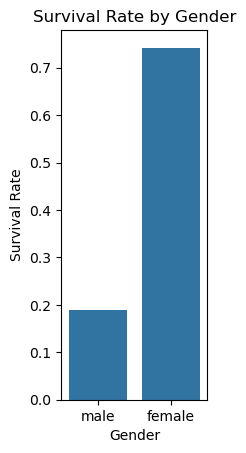

In [60]:
# Gender Survival Rate
plt.subplot(1, 3, 1)
sns.barplot(x='sex', y='survived', data=titanic, errorbar=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')

Text(0.5, 0, 'Age Group')

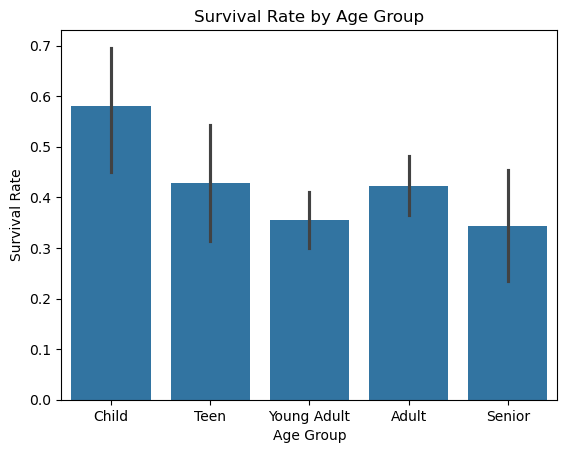

In [61]:
# Age Group Survival Rate
plt.subplot(1, 1, 1)
sns.barplot(x='age_group', y='survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')

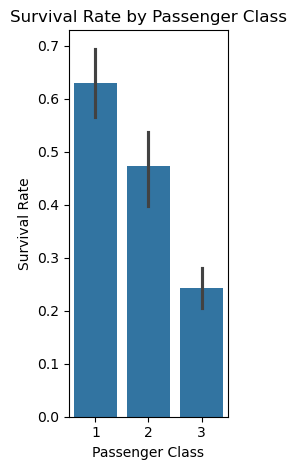

In [62]:
# Passenger Class Survival Rate
plt.subplot(1, 3, 3)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')

plt.tight_layout()
plt.show()

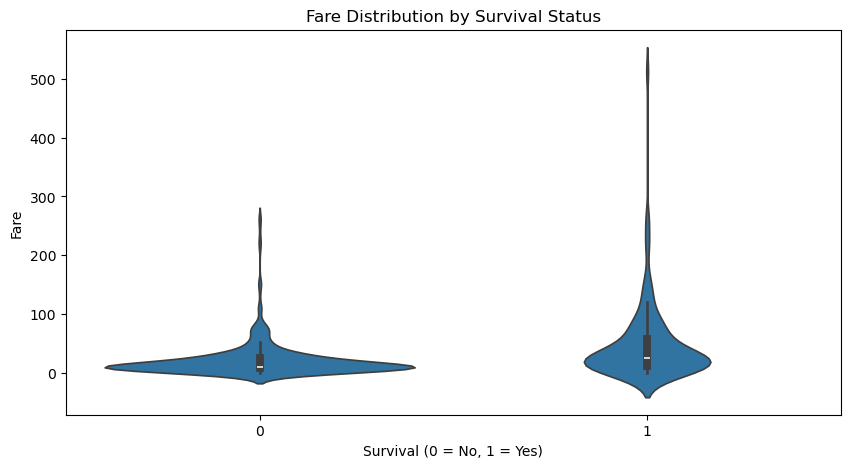

In [63]:
# Fare Distribution with Survival Rate
plt.figure(figsize=(10, 5))
sns.violinplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival Status')
plt.ylabel('Fare')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.show()

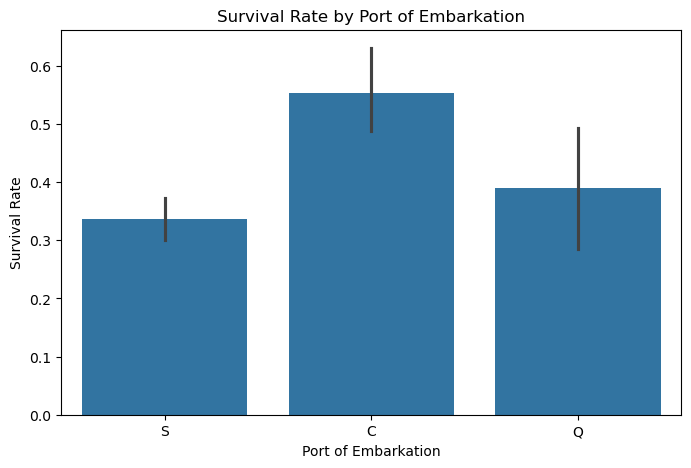

In [64]:
# Survival Rate by Embarked
plt.figure(figsize=(8, 5))
sns.barplot(x='embarked', y='survived', data=titanic)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')

plt.show()

<Figure size 1000x600 with 0 Axes>

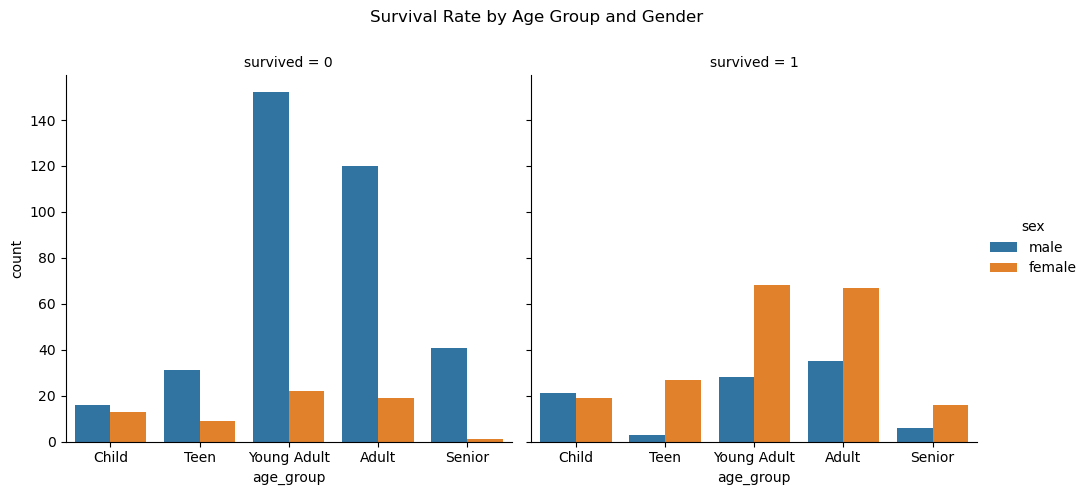

In [65]:
# Combined Age and Gender Survival Rate
plt.figure(figsize=(10, 6))
sns.catplot(x='age_group', hue='sex', col='survived', data=titanic, kind='count', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Rate by Age Group and Gender')
plt.show()

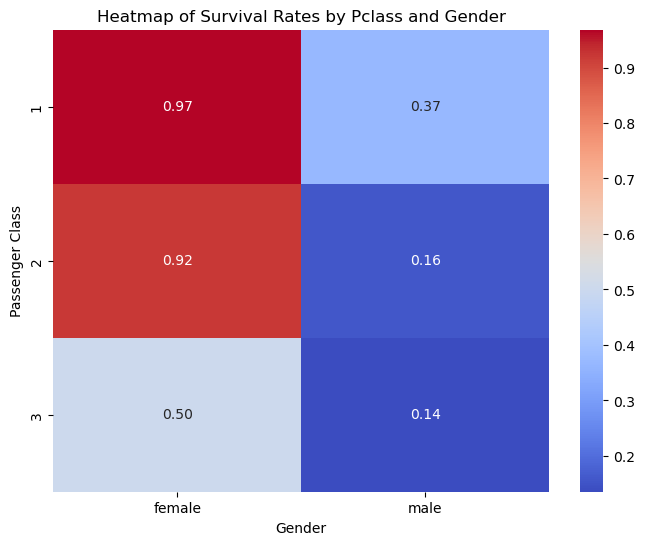

In [66]:
# Heatmap of Survival by Pclass, Sex, and Age Group
heatmap_data = titanic.pivot_table(index='pclass', columns='sex', values='survived', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Survival Rates by Pclass and Gender')
plt.ylabel('Passenger Class')
plt.xlabel('Gender')
plt.show()